<h1>
<hr style=" border:none; height:3px;">
<center>Explanatory Data Analysis</center>
<hr style=" border:none; height:3px;">
</h1>

<center><img src='https://www.devstree.com/wp-content/uploads/2025/02/Exploratory-Data-Analysis-EDA-Revealing-Hidden-Business-Opportunities.png' width=300></center>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

## I - Read & convert in dataframes

In [35]:
df_client = pd.read_csv('client_data.csv')
df_price = pd.read_csv('price_data.csv')

In [22]:
df_client.head(2)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0


In [24]:
df_price.head(2)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0


## II - Check data types & calculate statistics

In [25]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [26]:
df_client.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


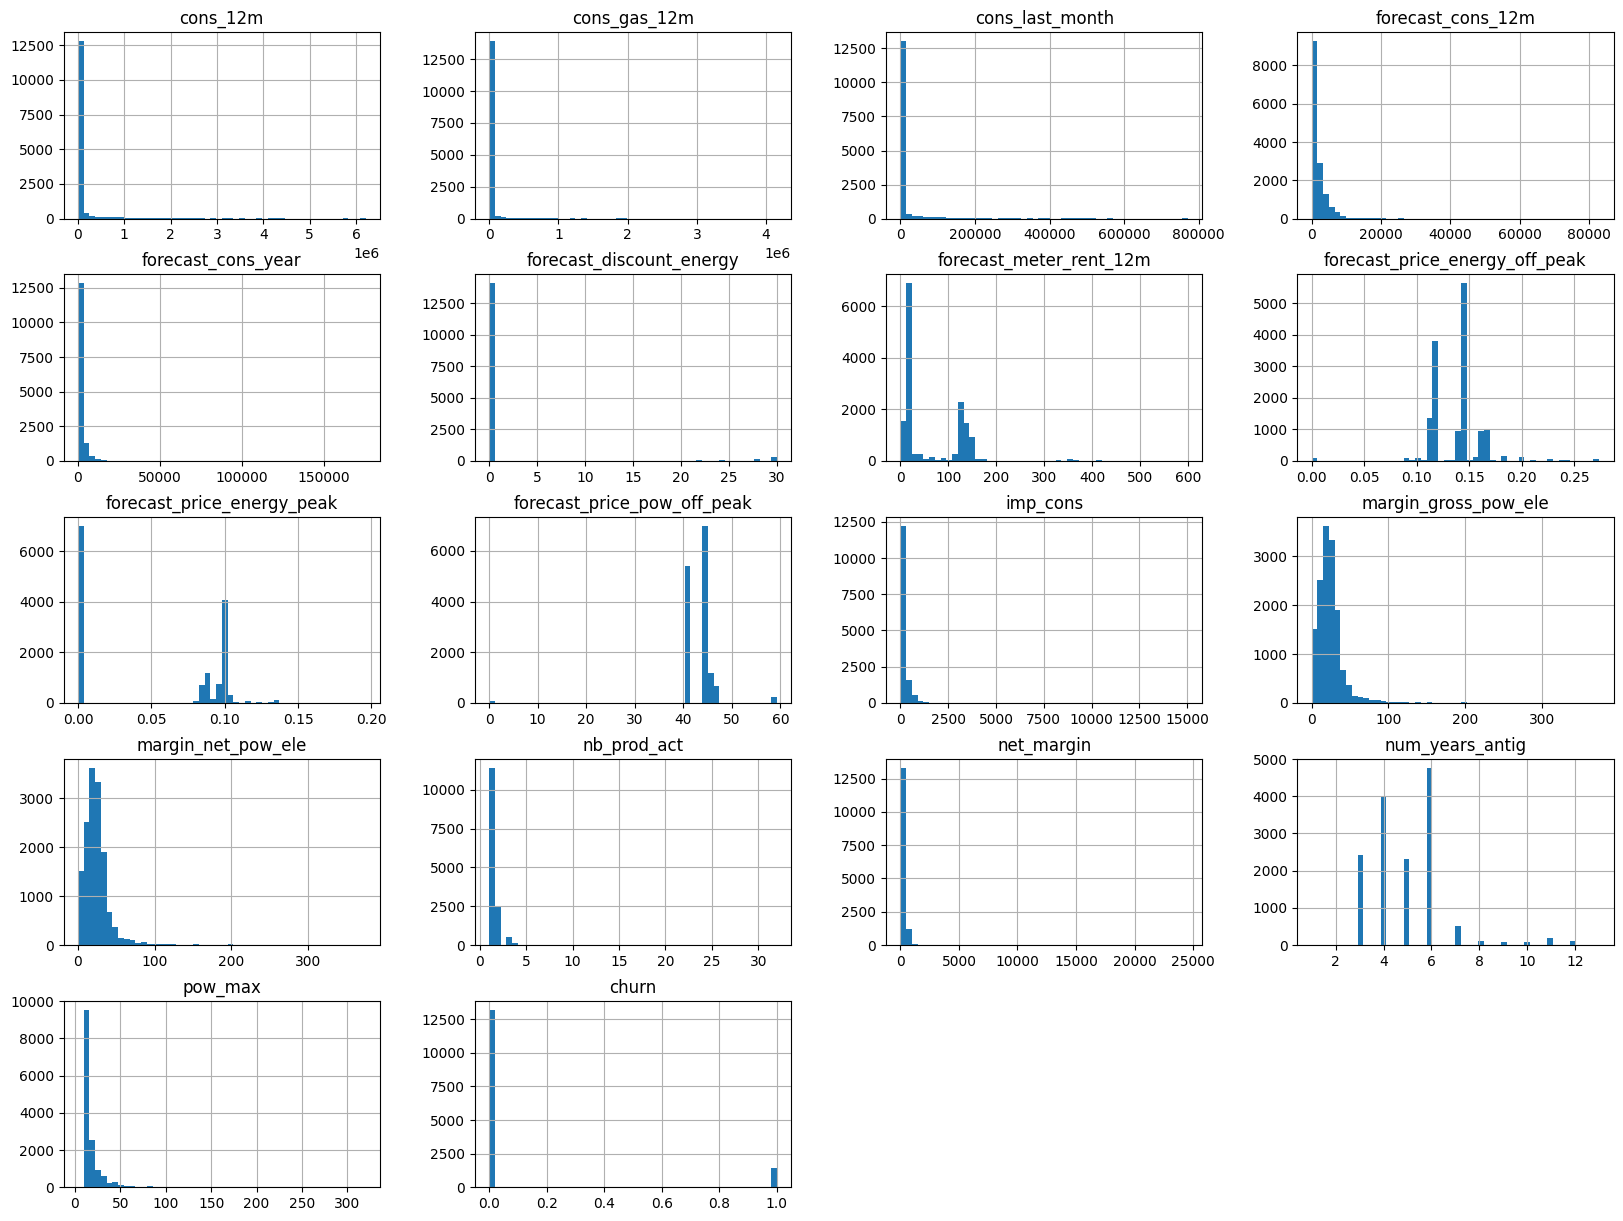

In [27]:
df_client.hist(bins=50, figsize=(20,15))
plt.show()

<div class='alert alert-bloc alert-info'>We can see the distributions are pretty clean with no obvious outliers. However, it seems like most of PowerCo's customers are relatively small (particulars, SMEs (?)). Margins seem to follow a normal distribution, even though the consumption seem to have a much lower variance. This is maybe the sign that we are less competitive on some customer segments, but we would need to link both dataframes to verify this hypothesis</div>

## III - Correlations

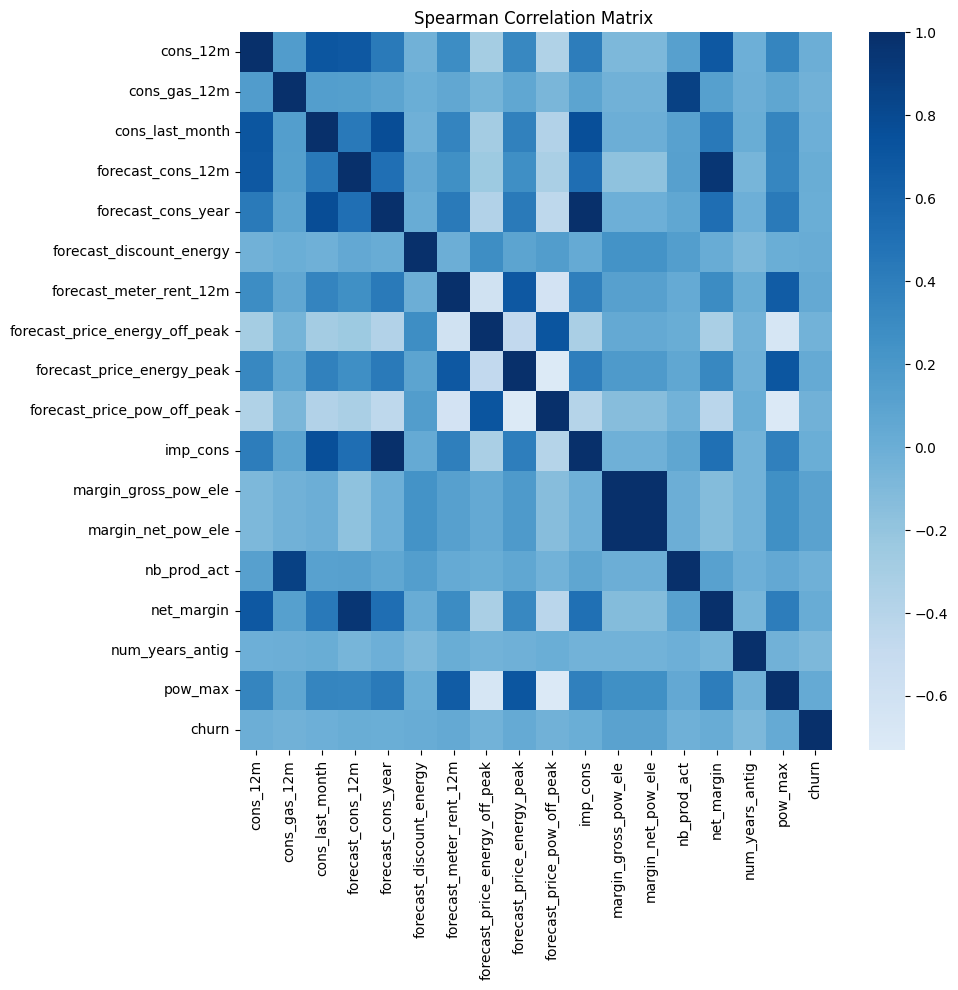

In [28]:
corr = df_client.corr(method='spearman', numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='Blues', center=0)
plt.title('Spearman Correlation Matrix ')
plt.tight_layout()
plt.show()

<div class='alert alert-bloc alert-info'>We can see that there is redundant information, but churn does seem slightly correlated to pow_max, margins, price and consumptions. This is as per our expectations.</div>

## IV - Vizualisation

In [29]:
# Simulate a client_df DataFrame similar to the one described
client_df = df_client

# Prepare data for churn pie chart
churn = client_df[['id', 'churn']].rename(columns={'id': 'Companies'})
churn_total = churn.groupby('churn').count().reset_index()
churn_total.columns = ['churn', 'Total']
churn_total['Percentage'] = churn_total['Total'] / churn_total['Total'].sum() * 100

# Plotly pie chart for churn (macro view)
fig_macro = px.pie(churn_total, names='churn', values='Percentage', title='Churn Percentage Distribution')
fig_macro.update_traces(textposition='inside', textinfo='percent+label')

# Prepare data for stacked bar chart per category
category_churn = client_df.groupby(['channel_sales', 'churn']).size().reset_index(name='count')
category_pivot = category_churn.pivot(index='channel_sales', columns='churn', values='count').fillna(0)

# Plotly stacked bar chart
fig_stacked = go.Figure()
for churn_status in category_pivot.columns:
    fig_stacked.add_trace(go.Bar(
        x=category_pivot.index,
        y=category_pivot[churn_status],
        name=churn_status
    ))

fig_stacked.update_layout(
    barmode='stack',
    title='Churn by Category (Stacked Bar)',
    xaxis_title='Category',
    yaxis_title='Count'
)

fig_macro.show()
fig_stacked.show()

<div class='alert alert-bloc alert-info'>
We first notice a high class imbalance (9.72% of the base is churning), which will need to be taken care of.<br>
Then, we also notice that depending on the sales channel, the proportion of churn is varying a lot. We can thus assume the <b>fifth sales channel (foosdf...)</b> is to be looked into in order to solve PowerCo's issue. Indeed, the proportion of churning customers is <b>much higher</b>

<br>Perhaps we can link this channel with high commission fees, which would refine our hypothesis of price sensibility, but perhaps there is a bigger issue at hands such as customer service or a highly competitive offer from our competitors on this particular sales channel.
</div>

# V - Price data

In [33]:
df_price.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [37]:
np.random.seed(0)
dates = pd.date_range(start="2015-01-01", periods=12, freq='MS')
client_ids = [f"client_{i}" for i in range(5)]

# Aggregating average prices per date
df_avg = df_price.groupby("price_date", as_index=False).agg({
    "price_off_peak_var": "mean",
    "price_off_peak_fix": "mean"
})

# Create interactive plot with Plotly
fig = go.Figure()

# Add variable price (left y-axis)
fig.add_trace(go.Scatter(
    x=df_avg['price_date'], 
    y=df_avg['price_off_peak_var'],
    mode='lines+markers',
    name='Avg Off Peak Variable Price',
    yaxis='y1'
))

# Add fixed price (right y-axis)
fig.add_trace(go.Scatter(
    x=df_avg['price_date'], 
    y=df_avg['price_off_peak_fix'],
    mode='lines+markers',
    name='Avg Off Peak Fixed Price',
    yaxis='y2'
))

# Configure layout for dual axes
fig.update_layout(
    title='Average Price Evolution Over Time (Dual Axis)',
    xaxis=dict(title='Date'),
    yaxis=dict(
        title='Off Peak Variable Price',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue')
    ),
    yaxis2=dict(
        title='Off Peak Fixed Price',
        titlefont=dict(color='orange'),
        tickfont=dict(color='orange'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.01, y=0.99),
    template='plotly_white'
)

# Show plot
fig.show()


<div class='alert alert-bloc alert-success'> We do see that there has been sharp movements in the market of energy prices. To conclude if there is price sensitivity, one thing we could do is plot the churn rate per month, and see if there is a correlation between market movements and churn rates (with eventually one month of delay to account for clients' reaction time)</div>

In [38]:
df_client['date_end'] = pd.to_datetime(df_client['date_end'], errors='coerce')

# Drop rows with invalid dates
df_client = df_client.dropna(subset=['date_end'])

# Create a month column
df_client['end_month'] = df_client['date_end'].dt.to_period('M').astype(str)

# Group and pivot data
monthly_churn = df_client.groupby(['end_month', 'churn']).size().reset_index(name='count')
monthly_pivot = monthly_churn.pivot(index='end_month', columns='churn', values='count').fillna(0)

# Plot
fig = go.Figure()
for churn_status in monthly_pivot.columns:
    fig.add_trace(go.Bar(
        x=monthly_pivot.index,
        y=monthly_pivot[churn_status],
        name=f"Churn: {churn_status}"
    ))

fig.update_layout(
    barmode='stack',
    title='Churn Count by Month of Contract End Date',
    xaxis_title='Month',
    yaxis_title='Number of Clients',
    xaxis_tickangle=-45,
    template='plotly_white'
)

fig.show()


<div class='alert alert-bloc alert-info'>It looks like there <b>is price sensitivity</b> in the sense that average off peak price of energy skyrocketed in October-December, which are directly correlated with the highest number of churns in year 2016 (assuming these are 1 year contract). However, it does not fully explain the problem as June showed significant churn too, with regular prices.
Due to time limitations, I will have to stop the EDA here, but next steps would involve calculating price elasticity in more refined analysis, as well as dive deeper in some specific features such as consumption, which has been identified in the correlation matrix but not put in regards to prices yet.</div>